In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import pandas as pd
from scipy import stats


matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 18
# import matplotlib.pyplot as plt
# from numba import njit



In [ ]:
def average_in_ranges(X, Y, step):
    # Create bins based on the specified step size
    min_x = np.min(X)
    max_x = np.max(X)
    bins = np.arange(min_x, max_x, step)
    
    # Initialize a list to store averages
    averages = []
    stds = []
    
    # Iterate through the bins to calculate averages
    for i in range(len(bins) - 1):
        mask = (X >= bins[i]) & (X <= bins[i + 1])
        if np.any(mask):
            avg = np.mean(Y[mask])
            
            # print(mask)
            # print(Y[mask])
            std = np.std(Y[mask])
        else:
            avg = 0  # or you can use 0 or np.nan if you prefer
        averages.append(avg)
        stds.append(std)
        
        
    
    return bins, averages,stds

In [ ]:
# X = np.array([0, 1, 4, 5, 3])
# Y = np.array([4, 53, 45, 34, 5])
X,Y = np.random.randint(10,size=5),np.random.randint(10,size=5)
step_size = 1  # Adjust the step size as needed

bins, averages,std = average_in_ranges(X, Y, step_size)

# Calculate midpoints of bins for centered labels
midpoints = bins[:-1] + step_size / 2

# Plotting the histogram with centered range labels
plt.figure(figsize=(10, 6))
plt.bar(bins[:-1], averages, width=step_size, align='edge', edgecolor='black', alpha=0.7)
plt.show()

On this notebook, we analyse more in depth the claim that the speed increases as it approaches the apoptotic cell.


Video 1 

In [22]:
AC_video1_dataframe = pd.read_csv('data/apoptotic_cells/bigger_videos/video_1/AC_positions_video1_v2.csv' )
ids_AC_video1 = AC_video1_dataframe['Track ID'].unique()
AC_positions = pd.read_csv('data/apoptotic_cells/bigger_videos/video_1/AC_positions_video1.csv')
AC_names =AC_positions[['label']].values
AC_names = AC_names[:,0]
AC_video1_dataframe = AC_video1_dataframe.drop(columns=['Unnamed: 0'])
AC_video1_dataframe = AC_video1_dataframe.dropna()
# AC_video1_dataframe[AC_video1_dataframe['Classification']=='Before_Contact']['Track ID'].unique()
AC_video1_dataframe

,spot ID,Track ID,x (micron),y (micron),t (sec),Frame,Classification,squared displacement,vx,vy,speed
1,2338,0,27.565505,118.990521,3.343005,1,Back,1.037898,0.268966,-0.144828,0.305479
2,2343,0,28.186505,118.852521,6.686010,2,Back,2.689966,0.186207,-0.041379,0.190749
3,2347,0,28.876505,118.645522,10.029015,3,Back,5.560850,0.206897,-0.062069,0.216006
4,2350,0,29.290505,118.455771,13.372020,4,Back,7.910702,0.124138,-0.056897,0.136556
5,2353,0,29.911505,117.990021,16.715025,5,Back,12.717826,0.186207,-0.139655,0.232759
...,...,...,...,...,...,...,...,...,...,...,...
6055,31325,30,101.688768,109.296020,658.571987,197,Back,4562.105222,0.000000,0.000000,0.000000
6056,31328,30,101.533518,109.347770,661.914993,198,Back,4541.280605,-0.046552,0.015517,0.049070
6057,31331,30,101.533518,109.347770,665.257997,199,Back,4541.280605,0.000000,0.000000,0.000000
6058,31334,30,101.533518,109.347770,668.601003,200,Back,4541.280605,0.000000,0.000000,0.000000


In [ ]:
speeds_video1 = [] 
distances_video1 = []
acc_video1 = []
for i,id in enumerate(ids_AC_video1):
    traj= AC_video1_dataframe[AC_video1_dataframe['Track ID'] == id].sort_values('Frame')
    # status = traj[traj['Frame']==0]['Classification'].values[0]
    
    # if status == 'Back':
    #     continue
    # elif status == 'After_Contact':
    #     continue
    # else:
   
    # print(f'id {id}')
  
    X = traj.values[:,2]
    Y = traj.values[:,3]
    time = traj.values[:,4]
    speed = traj.values[:,10]
    acc = np.diff(speed)/np.diff(time)
    speeds_video1.append(speed)
    acc_video1.append(acc)
    if np.max(speed) > 0.6:
        print(f'big speed = {speed.max():.3f} id {id}')
        status = traj[traj['Frame']==199]['Classification'].values[0]
        print(status)
    
    min_dist = []
    for t in range(len(X)):
        dist_to_ACs = []
        for name in AC_names:
            x_AC = AC_positions[AC_positions['label']==name]['x (micron)'].values[0]
            y_AC = AC_positions[AC_positions['label']==name]['y (micron)'].values[0]
            dist = np.sqrt((x_AC-X[t])**2+(y_AC-Y[t])**2)
            dist_to_ACs.append(dist)
        distante_to_nearestAC = np.min(dist_to_ACs)
        min_dist.append(distante_to_nearestAC)
        # with open(f'data/apoptotic_cells/bigger_videos/video_1/distance_to_nearest_AC/lmin_time_id_{int(id)}.dat', 'a') as kk:
        #     kk.write(f'{time[t]:.3f} {distante_to_nearestAC:.5f} \n')
    distances_video1.append(min_dist)
        
distances_video1_for_acc = np.array(distances_video1)
flat_dis_acc_video1 = np.hstack(distances_video1_for_acc[:,:-1])
flat_distances_video1 = np.hstack(distances_video1)
flat_speeds_video1 = np.hstack(speeds_video1) 
flat_acc_video1 = np.hstack(acc_video1)

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(14,4.5))
flat_distances = flat_distances_video1
flat_speeds=flat_speeds_video1
flat_acc = flat_acc_video1
distances,speeds,acc = distances_video1,speeds_video1,acc_video1
x = flat_distances
y = flat_speeds
H, xedges, yedges = np.histogram2d(x, y, bins=60)
H = H.T
res = stats.pearsonr(flat_distances,flat_speeds)
# xcenters = (xedges[:-1] + xedges[1:]) / 2
# ycenters = (yedges[:-1] + yedges[1:]) / 2

ax[1].pcolormesh(xedges,yedges,H)
ax[0].scatter(flat_distances,flat_speeds,s=3,label=f'stat={res[0]:.4f}'+'\n'+f'pvalue={res[1]:.4f}')
ax[2].scatter(flat_dis_acc_video1,flat_acc_video1,s=3)


for a in ax[:]:
    a.set_xlabel(r'distance to nearest AC ($\mu m$)')
    a.set_ylabel(r'speed ($\mu m/s$)')
    # a.semilogy()
ax[2].set_ylabel(r'acceleration ($\mu m/s^2$)')
for b in [0]:
    ax[b].legend(fontsize=14)
    
plt.tight_layout()
plt.show()
# plt.savefig('data/apoptotic_cells/bigger_videos/video_1/video1_speeds_vs_distance_to_AC.pdf',dpi=200,bbox_inches="tight")




In [ ]:
X = flat_distances_video1
Y = flat_speeds_video1
Z = np.abs(flat_acc_video1)
X2 = flat_dis_acc_video1
step_size = 10  

bins, averages,std = average_in_ranges(X, Y, step_size)
bins_acc,avg_acc, std_acc = average_in_ranges(X2,Z,step_size)

range_labels = [f"{int(bins[i])}-{int(bins[i+1])}" for i in range(len(bins) - 1)]
midpoints = bins[:-1] + step_size / 2

range_labels_acc = [f"{int(bins_acc[i])}-{int(bins_acc[i+1])}" for i in range(len(bins_acc) - 1)]
midpoints_acc = bins_acc[:-1] + step_size / 2

fig,ax2 = plt.subplots(1,2,figsize =(14,5.5))
ax = ax2[0]
ax.bar(bins[:-1], averages, yerr=std,width=step_size, capsize=5,lw=0.8,align='edge', edgecolor='black', alpha=0.7)
ax.set_xlabel(r'distance to nearest AC ($\mu m$)')
ax.set_ylabel(r'average speed ($\mu m/s$)')

ax.set_xticks(midpoints, range_labels)
ax.tick_params(axis='both', labelsize=14)# Show bin edges on x-axis


ax2[1].bar(bins_acc[:-1], avg_acc,width=step_size, capsize=5,lw=0.8,align='edge', edgecolor='black', alpha=0.7)
ax2[1].set_xlabel(r'distance to nearest AC ($\mu m$)')
ax2[1].set_ylabel(r'average acceleration ($\mu m/s^2$)')

ax2[1].set_xticks(midpoints_acc, range_labels_acc)
ax2[1].tick_params(axis='both', labelsize=14)# Show bin edges on x-axis

ax.grid(axis='y', linestyle='--', alpha=0.7)
ax2[1].grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
# plt.savefig('data/apoptotic_cells/bigger_videos/video_1/video1_speeds_vs_distance_to_AC_avgs_bar_plot_wstd.pdf',dpi=200,bbox_inches="tight")
plt.show()

Video 2

In [5]:

AC_video2_dataframe = pd.read_csv('data/apoptotic_cells/bigger_videos/video_2/AC_positions_video2_v2.csv')
ids_AC_video2 = AC_video2_dataframe['Track ID'].unique()
ACs_pos_DF = pd.read_csv('data/apoptotic_cells/bigger_videos/video_2/AC_positions_video2.csv',usecols=['X','Y'])
AC_positions = ACs_pos_DF.values
# AC_positions.shape
AC_names = ['A','B','C','D','E','F','G','H','I','J','K','L', 'M']
ids_that_touched_AC = [30,34,2,3,20,9,5,15,13,10,1,6]
AC_video2_dataframe = AC_video2_dataframe.drop(columns=['Unnamed: 0'])
AC_video2_dataframe = AC_video2_dataframe.dropna()
# AC_video2_dataframe

In [ ]:

speeds_video2 = [] 
distances_video2 = []
acc_video2 = []
for i,id in enumerate(ids_AC_video2):
    traj= AC_video2_dataframe[AC_video2_dataframe['Track ID'] == id].sort_values('Frame')
    # status = traj[traj['Frame']==0]['Classification'].values[0]
    
    # if status == 'Back':
    #     print(f'id back {id}')
    #     X = traj.values[:,2]
    #     Y = traj.values[:,3]
    #     time = traj.values[:,4]
    # elif status == 'After_Contact':
    #     print(f'id always touch {id}')
    #     continue
    # else:
    # print(f'id {id}')
    # traj = traj[traj['Classification']=='Before_Contact']
    X = traj.values[:,2]
    Y = traj.values[:,3]
    time = traj.values[:,4]
    speed = traj.values[:,10]
    acc = np.diff(speed)/np.diff(time)
    speeds_video2.append(speed)
    acc_video2.append(acc)
    if np.max(speed) >0.6:
        print(f'big speed = {speed.max():.3f} id {id}')
        status = traj[traj['Frame']==199]['Classification'].values[0]
        print(status)
    min_dist = []
    for t in range(len(X)):
        dist_to_ACs = []
        for cell in AC_positions:
            dist = np.sqrt((cell[0]-X[t])**2+(cell[1]-Y[t])**2)
            dist_to_ACs.append(dist)
        distante_to_nearestAC = np.min(dist_to_ACs)

        min_dist.append(distante_to_nearestAC)
        # with open(f'data/apoptotic_cells/bigger_videos/video_2/distance_to_nearest_AC/lmin_time_id_{int(id)}.dat', 'a') as kk:
        #     kk.write(f'{time[t]:.3f} {distante_to_nearestAC:.5f} \n')
    distances_video2.append(min_dist)
    
distances_video2_for_acc = np.array(distances_video2)
flat_dis_acc_video2 = np.hstack(distances_video2_for_acc[:,:-1])  
flat_distances_video2 = np.hstack(distances_video2)
flat_speeds_video2 = np.hstack(speeds_video2) 
flat_acc_video2 = np.hstack(acc_video2)

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(14,4.5))
speeds,distances,acc = speeds_video2,distances_video2,acc_video2
flat_distances,flat_speeds = flat_distances_video2,flat_speeds_video2
x = flat_distances_video2
y = flat_speeds_video2
H, xedges, yedges = np.histogram2d(x, y, bins=60)
H = H.T
# xcenters = (xedges[:-1] + xedges[1:]) / 2
# ycenters = (yedges[:-1] + yedges[1:]) / 2
res = stats.pearsonr(flat_distances,flat_speeds)

ax[1].pcolormesh(xedges,yedges,H)
ax[0].scatter(flat_distances,flat_speeds,s=3,label=f'stat={res[0]:.4f}'+'\n'+f'pvalue={res[1]:.4f}')
# ax[2].scatter(distances[28],speeds[28], label =f'id {ids_AC_video2[28]}')
ax[2].scatter(flat_dis_acc_video2,flat_acc_video2,s=3)


for a in ax:
    a.set_xlabel(r'distance to nearest AC ($\mu m$)')
    a.set_ylabel(r'speed ($\mu m/s$)')
    # a.semilogy()

ax[2].set_ylabel(r'acceleration ($\mu m/s^2$)')
ax[0].legend(fontsize=14)
plt.tight_layout()
plt.show()
# plt.savefig('data/apoptotic_cells/bigger_videos/video_2/video2_speeds_vs_distance_to_AC.pdf',dpi=200,bbox_inches="tight")




In [ ]:
X = flat_distances_video2
Y = flat_speeds_video2
Z = np.abs(flat_acc_video2)
X2 = flat_dis_acc_video2
step_size = 10  # Adjust the step size as needed

bins, averages,std = average_in_ranges(X, Y, step_size)
bins_acc,avg_acc, std_acc = average_in_ranges(X2,Z,step_size)


range_labels = [f"{int(bins[i])}-{int(bins[i+1])}" for i in range(len(bins) - 1)]
midpoints = bins[:-1] + step_size / 2

range_labels_acc = [f"{int(bins_acc[i])}-{int(bins_acc[i+1])}" for i in range(len(bins_acc) - 1)]
midpoints_acc = bins_acc[:-1] + step_size / 2

fig,ax2 = plt.subplots(1,2,figsize =(14,5.5))
ax = ax2[0]
ax.bar(bins[:-1], averages, yerr=std,width=step_size, capsize=5,lw=0.8,align='edge', edgecolor='black', alpha=0.7)
ax.set_xlabel(r'distance to nearest AC ($\mu m$)')
ax.set_ylabel(r'average speed ($\mu m/s$)')

ax.set_xticks(midpoints, range_labels)
ax.tick_params(axis='both', labelsize=14)# Show bin edges on x-axis


ax2[1].bar(bins_acc[:-1], avg_acc,width=step_size, capsize=5,lw=0.8,align='edge', edgecolor='black', alpha=0.7)
ax2[1].set_xlabel(r'distance to nearest AC ($\mu m$)')
ax2[1].set_ylabel(r'average acceleration ($\mu m/s^2$)')

ax2[1].set_xticks(midpoints_acc, range_labels_acc)
ax2[1].tick_params(axis='both', labelsize=14)# Show bin edges on x-axis

ax.grid(axis='y', linestyle='--', alpha=0.7)
ax2[1].grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
# plt.savefig('data/apoptotic_cells/bigger_videos/video_1/video1_speeds_vs_distance_to_AC_avgs_bar_plot_wstd.pdf',dpi=200,bbox_inches="tight")
plt.show()

Video 5

In [6]:
video=5
AC_video5_dataframe = pd.read_csv('data/apoptotic_cells/bigger_videos/video_5/AC_positions_video5_v2.csv')
ids_AC_video5 = AC_video5_dataframe['Track ID'].unique()
AC_positions = np.loadtxt('data/apoptotic_cells/bigger_videos/video_5/AC_positions.dat')
AC_video5_dataframe = AC_video5_dataframe.dropna()
AC_video5_dataframe = AC_video5_dataframe.drop(columns=['Unnamed: 0'])
AC_video5_dataframe

,spot ID,Track ID,x (micron),y (micron),t (sec),Frame,Classification,squared displacement,vx,vy,speed
1,2050,0,70.690513,40.882507,3.348253,1,After_Contact,0.005356,0.015517,-0.015517,0.021945
2,2053,0,70.690513,40.882507,6.696506,2,After_Contact,0.005356,0.000000,0.000000,0.000000
3,2056,0,70.690513,40.986007,10.044759,3,After_Contact,0.005356,0.000000,0.031034,0.031034
4,2059,0,70.690513,40.986007,13.393013,4,After_Contact,0.005356,0.000000,0.000000,0.000000
5,2062,0,70.690513,40.986007,16.741266,5,After_Contact,0.005356,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
6203,73762,30,116.230521,39.123007,656.257614,196,Before_Contact,277.715182,0.010345,-0.010345,0.014630
6204,73765,30,116.368521,39.261007,659.605867,197,Before_Contact,271.554445,0.041379,0.041379,0.058519
6205,73768,30,116.023521,39.364507,662.954120,198,Before_Contact,273.838536,-0.103448,0.031034,0.108003
6206,73771,30,115.920021,39.433507,666.302373,199,Before_Contact,273.473128,-0.031034,0.020690,0.037299


In [ ]:

speeds_video5 = [] 
distances_video5 = []
acc_video5 = []
distances_video5_acc =[] 
for i,id in enumerate(ids_AC_video5):
    traj= AC_video5_dataframe[AC_video5_dataframe['Track ID'] == id].sort_values('Frame')

    X = traj.values[:,2]
    Y = traj.values[:,3]
    time = traj.values[:,4]
    speed = traj.values[:,10]
    acc = np.diff(speed)/np.diff(time)
    acc_video5.append(acc)
    speeds_video5.append(speed)    
    # if np.max(speed) >0.65:
    #     print(f'big speed = {speed.max():.3f} id {id}')
    #     status = traj[traj['Frame']==199]['Classification'].values[0]
    #     print(status)
    min_dist = []
    for t in range(len(X)):
        dist_to_ACs = []
        for cell in AC_positions:
            dist = np.sqrt((cell[0]-X[t])**2+(cell[1]-Y[t])**2)
            dist_to_ACs.append(dist)
        distante_to_nearestAC = np.min(dist_to_ACs)
        min_dist.append(distante_to_nearestAC)
    distances_video5.append(min_dist)
    distances_video5_acc.append(min_dist[:-1])

# distances_video5_for_acc = np.array(distances_video5)
# flat_dis_acc_video5 = np.hstack(distances_video5_for_acc[:,:-1])
flat_distances_video5 = np.concatenate(distances_video5)
flat_speeds_video5 = np.concatenate(speeds_video5)
flat_acc_video5 = np.hstack(acc_video5)
flat_dis_acc_video5 = np.hstack(distances_video5_acc)

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(14,4.5))
flat_distances,flat_speeds = flat_distances_video5,flat_speeds_video5
distances,speeds = distances_video5,speeds_video5
x = flat_distances_video5
y = flat_speeds_video5
H, xedges, yedges = np.histogram2d(x, y, bins=[np.arange(0,120,20),20])
H = H.T
# xcenters = (xedges[:-1] + xedges[1:]) / 2
# ycenters = (yedges[:-1] + yedges[1:]) / 2
res = stats.pearsonr(flat_distances_video5,flat_speeds_video5)

ax[1].pcolormesh(xedges,yedges,H)
ax[0].scatter(flat_distances,flat_speeds,s=3,label=f'stat={res[0]:.4f}'+'\n'+f'pvalue={res[1]:.4f}')
ax[2].scatter(flat_dis_acc_video5,flat_acc_video5,s=3)



for a in ax:
    a.set_xlabel(r'distance to nearest AC ($\mu m$)')
    a.set_ylabel(r'speed ($\mu m/s$)')
    # a.semilogy()
    # a.set_ylim((0,0.5))
ax[2].set_ylabel(r'acceleration ($\mu m/s^2$)')

ax[0].legend(fontsize=14)
plt.tight_layout()
plt.show()
# plt.savefig('data/apoptotic_cells/bigger_videos/video_5/video5_speeds_vs_distance_to_AC.pdf',dpi=200,bbox_inches="tight")




In [ ]:
X = flat_distances_video5
Y = flat_speeds_video5
Z = np.abs(flat_acc_video5)
X2 = flat_dis_acc_video5
step_size = 10  # Adjust the step size as needed

bins, averages,std = average_in_ranges(X, Y, step_size)
bins_acc,avg_acc, std_acc = average_in_ranges(X2,Z,step_size)

range_labels = [f"{int(bins[i])}-{int(bins[i+1])}" for i in range(len(bins) - 1)]
midpoints = bins[:-1] + step_size / 2

range_labels_acc = [f"{int(bins_acc[i])}-{int(bins_acc[i+1])}" for i in range(len(bins_acc) - 1)]
midpoints_acc = bins_acc[:-1] + step_size / 2

fig,ax2 = plt.subplots(1,2,figsize =(14,5.5))
ax = ax2[0]
ax.bar(bins[:-1], averages, yerr=std,width=step_size, capsize=5,lw=0.8,align='edge', edgecolor='black', alpha=0.7)
ax.set_xlabel(r'distance to nearest AC ($\mu m$)')
ax.set_ylabel(r'average speed ($\mu m/s$)')

ax.set_xticks(midpoints, range_labels)
ax.tick_params(axis='both', labelsize=14)# Show bin edges on x-axis


ax2[1].bar(bins_acc[:-1], avg_acc,width=step_size, capsize=5,lw=0.8,align='edge', edgecolor='black', alpha=0.7)
ax2[1].set_xlabel(r'distance to nearest AC ($\mu m$)')
ax2[1].set_ylabel(r'average acceleration ($\mu m/s^2$)')

ax2[1].set_xticks(midpoints_acc, range_labels_acc)
ax2[1].tick_params(axis='both', labelsize=14)# Show bin edges on x-axis

ax.grid(axis='y', linestyle='--', alpha=0.7)
ax2[1].grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
# plt.savefig('data/apoptotic_cells/bigger_videos/video_1/video1_speeds_vs_distance_to_AC_avgs_bar_plot_wstd.pdf',dpi=200,bbox_inches="tight")
plt.show()

Joining all videos with ACs


In [ ]:
def ttest(v1,v2,s1,s2):
    s = np.sqrt(s1**2+s2**2)
    return (v1-v2)/s
    


In [ ]:
distances_all = np.concatenate((flat_distances_video1,flat_distances_video2,flat_distances_video5))
speeds_all = np.concatenate((flat_speeds_video1,flat_speeds_video2,flat_speeds_video5))
acc_all = np.abs(np.hstack((flat_acc_video1,flat_acc_video2,flat_acc_video5)))
distance_acc_all = np.hstack((flat_dis_acc_video1,flat_dis_acc_video2,flat_dis_acc_video5))
step_size = 15
bins, averages,std = average_in_ranges(distances_all, speeds_all, step_size)
bins_acc_all, averages_acc_all, std_acc_all = average_in_ranges(distance_acc_all, acc_all, step_size)
res = stats.pearsonr(bins[:-1],averages)
v1 = np.max(averages)
v2 = np.min(averages)
s1 = std[np.where(averages == np.max(averages))[0][0]]
s2 = std[np.where(averages == np.min(averages))[0][0]]
t_test = ttest(v1,v2,s1,s2)

# Plotting the histogram
range_labels = [f"{int(bins[i])}-{int(bins[i+1])}" for i in range(len(bins) - 1)]
midpoints = bins[:-1] + step_size / 2

range_labels_acc_all = [f"{int(bins_acc_all[i])}-{int(bins_acc_all[i+1])}" for i in range(len(bins_acc_all) - 1)]
midpoints_acc_all = bins_acc_all[:-1] + step_size / 2
fig,ax = plt.subplots(1,3,figsize =(16,5.5))
# ax.plot(distances_all,speeds_all,color='red',lw=0.6,alpha=0.1)
# ax.scatter(distances_all,speeds_all,color='red',s=1,alpha=0.1)
ax[0].bar(bins[:-1], averages, width=step_size, yerr=std,capsize=5,lw=0.8, align='edge', edgecolor='black', alpha=0.9, label=f'stat = {res[0]:.3f}'+'\n'+f't-test between max and min = {t_test:.3f}')
ax[2].bar(bins_acc_all[:-1], averages_acc_all, width=step_size,capsize=5,lw=0.8, align='edge', edgecolor='black', alpha=0.9)
ax[2].set_ylabel(r'average acceleration ($\mu m/s^2$)')
ax[0].legend(fontsize=10)
ax[1].scatter(distances_all,speeds_all,color='red',s=1)
ax[0].set_xticks(midpoints, range_labels)
ax[0].tick_params(axis='x', labelsize=12)
ax[0].set_ylabel(r'average speed ($\mu m/s$)')
ax[1].set_ylabel(r'speed ($\mu m/s$)')
for a in ax:
    a.set_xlabel(r'distance to nearest AC ($\mu m$)')
    


    # Show bin edges on x-axis
    a.grid(axis='y', linestyle='--', alpha=0.7)

# plt.savefig('data/apoptotic_cells/bigger_videos/video_5/video5_speeds_vs_distance_to_AC_avgs_bar_plot_wstd.pdf',dpi=200,bbox_inches="tight")
plt.tight_layout()
plt.show()

In [ ]:
std[np.where(averages == np.max(averages))[0][0]]

# With ghost cells 

In [ ]:
import pims
def diag(video):
    frames = pims.open(f'data/new-videos/video{video}/original_frames/*.tif')
    Lx=frames.shape[2]
    Ly=frames.shape[1]
    if video == 2:
        ydiag = -np.arange(Lx)+Ly
        m = -1
        b = Ly
    if video == 3:
        ydiag = 1.7*np.arange(Lx)
        m = 1.7
        b = 0.0
    if video == 4:
        ydiag = np.arange(Lx)
        m = 1
        b = 0.0
    return ydiag,m,b
# diag_array,m,b = diag(video,x_max_px,y_max_px)

# Function to check if a point is below the line
def is_below_line(video,x, y,m,b):
    if video == 3:
        return y > m * x + b
    else:
        return y < m*x + b

# Generate a random point below the line
def generate_random_point(video,width, height,m,b):
    while True:
        x_rand = np.random.uniform(0, width)
        y_rand = np.random.uniform(0, height)
        if is_below_line(video,x_rand, y_rand,m,b):
            return x_rand, y_rand
        

def average_in_ranges(X, Y, step):
    # Create bins based on the specified step size
    min_x = np.min(X)
    max_x = np.max(X)
    bins = np.arange(min_x, max_x, step)
    
    # Initialize a list to store averages
    averages = []
    stds = []
    
    # Iterate through the bins to calculate averages
    for i in range(len(bins) - 1):
        mask = (X >= bins[i]) & (X <= bins[i + 1])
        if np.any(mask):
            avg = np.mean(Y[mask])
            std = np.std(Y[mask])
        else:
            avg = 0  # or you can use 0 or np.nan if you prefer
        averages.append(avg)
        stds.append(std)
        
        
    
    return bins, averages,stds

In [ ]:

for video in [2,3,4]:

    frames = pims.open(f'data/new-videos/video{video}/original_frames/*.tif')
    # plt.imshow(frames_cells[0],cmap='inferno',alpha=1)
    # plt.imshow(frames_bacs[0],alpha=0.5)
    ppm=4.8309
    x_max_px=frames.shape[2]
    y_max_px=frames.shape[1]


    plt.imshow(frames[0],origin='lower')
    Lx_array = np.arange(x_max_px)
    # video=3
    diag_array,m,b = diag(video)
    pos_random_ACs = []
    for i in range(4):
        x_point, y_point = generate_random_point(video,x_max_px,y_max_px,m,b)
            
        pos_random_ACs.append([x_point,y_point])

    for pos in pos_random_ACs:
        plt.annotate('rand\npAC',xy=(pos[0],pos[1]),color='red',weight='bold',size=8)

    # plt.scatter(x_point,y_point, color='red')
        
    plt.plot(np.arange(x_max_px),diag_array,color='red', ls='--' )
    plt.title(f'video {video}')
    # plt.fill_between(Lx_array,diag_array,color='red',alpha=0.5)

    plt.xlim((0,x_max_px))
    plt.ylim((0,y_max_px))
    plt.show()

In [ ]:
# video=4

# frames = pims.open(f'data/new-videos/video{video}/original_frames/*.tif')
# # plt.imshow(frames_cells[0],cmap='inferno',alpha=1)
# # plt.imshow(frames_bacs[0],alpha=0.5)
# ppm=4.8309
# x_max_px=frames.shape[2]
# y_max_px=frames.shape[1]
# dataframe = pd.read_csv(f'data/new-videos/video{video}/video{video}_classif.csv')
# diag_array,m,b = diag(video)
# ids = dataframe['Track ID'].unique()

import statsmodels.api as sm

def generate_one_conf(video,ACnumber):
    pos_random_ACs = []
    frames = pims.open(f'data/new-videos/video{video}/original_frames/*.tif')
    x_max_px=frames.shape[2]
    y_max_px=frames.shape[1]
    
    for i in range(ACnumber):
        x_point, y_point = generate_random_point(video,x_max_px,y_max_px,m,b)
            
        pos_random_ACs.append([x_point,y_point])

    pos_random_ACs = np.array(pos_random_ACs)/ppm
    # fig,ax = plt.subplots()
    # for pos in pos_random_ACs:
    #     ax.imshow(frames[0],origin='lower')
    #     ax.annotate('rand\npAC',xy=(pos[0],pos[1]),color='red',weight='bold',size=8)
    #     ax.set_title(f'video {video}')
    #     ax.plot(np.arange(x_max_px),diag_array,color='red', ls='--' )
    #     ax.set_xlim((0,x_max_px))
    #     ax.set_ylim((0,y_max_px))
        
    # plt.show()
    distances = []
    speeds = []
    for id in ids:
        
        traj = np.loadtxt(f'data/new-videos/video{video}/time_x_y/time_x_y_id_{id}.dat')
        speed = np.loadtxt(f'data/new-videos/video{video}/velocities/mag_v_time_bact_id_{id}.dat',usecols=1)
        time = traj[:,0][1:]
        x = traj[:,1][1:]
        y = traj[:,2][1:]
        speeds.append(speed)
            # print(time)
 
            
            
            # file_xy = np.loadtxt(f'/media/janne/Transcend/bacteria/apoptotic_cells/time_x_y/time_x_y_id_{id}.dat') #time x y 
        

        min_dist_list = []
        for t in range(len(time)):
            dist_at_time_t=[]
            for cell in pos_random_ACs:
                
                dist_to_cell = np.sqrt((cell[0] - x[t])**2 + (cell[1] - y[t])**2)
                dist_at_time_t.append(dist_to_cell)
                
                
            min_dist_to_apoptotic = min(dist_at_time_t)
            min_dist_list.append(min_dist_to_apoptotic)
        distances.append(min_dist_list)
        
            # with open(file_name_min, 'a') as kk:

            #     kk.write(f'{time[t]} {min_dist_to_apoptotic:.3f}\n')
    return distances,speeds,pos_random_ACs

# distances,speeds = generate_one_conf(video,4)
# flat_distances = np.hstack(distances)
# flat_speeds = np.hstack(speeds)
distances_all_pAC, speeds_all_pAC = [],[]
for video in [2,3,4]:
    frames = pims.open(f'data/new-videos/video{video}/original_frames/*.tif')

    ppm=4.8309
    x_max_px=frames.shape[2]
    y_max_px=frames.shape[1]
    dataframe = pd.read_csv(f'data/new-videos/video{video}/video{video}_classif.csv')
    diag_array,m,b = diag(video)
    ids = dataframe['Track ID'].unique()
    distances,speeds,pos_random_ACs = generate_one_conf(video,4)
    flat_distances = np.hstack(distances)
    flat_speeds = np.hstack(speeds)
    distances_all_pAC.append(flat_distances)
    speeds_all_pAC.append(flat_speeds)
    
    

    # plt.scatter(x_point,y_point, color='red')
        
    
    
    

    step_size = 15
    bins, averages,std = average_in_ranges(flat_distances, flat_speeds, step_size)

    # Plotting the histogram
    range_labels = [f"{int(bins[i])}-{int(bins[i+1])}" for i in range(len(bins) - 1)]
    midpoints = bins[:-1] + step_size / 2
    fig,ax = plt.subplots(1,3,figsize =(18,5.5))
    for pos in pos_random_ACs:
        ax[2].imshow(frames[0],origin='lower')
        ax[2].annotate('rand\npAC',xy=(pos[0]*ppm,pos[1]*ppm),color='red',weight='bold',size=8)
        ax[2].set_title(f'video {video}')
        ax[2].plot(np.arange(x_max_px),diag_array,color='red', ls='--' )
        ax[2].set_xlim((0,x_max_px))
        ax[2].set_ylim((0,y_max_px))
        

    ax[0].bar(bins[:-1], averages, width=step_size, yerr=std,capsize=5,lw=0.8, align='edge', edgecolor='black', alpha=0.9)
    ax[1].scatter(flat_distances, flat_speeds,color='red',s=1)
    ax[0].set_xticks(midpoints, range_labels)
    ax[0].tick_params(axis='x', labelsize=8)

    ax[0].set_ylabel(r'average speed ($\mu m/s$)')
    ax[1].set_ylabel(r'speed ($\mu m/s$)')
    for a in ax:
        a.set_xlabel(r'distance to nearest AC ($\mu m$)')
        


        # Show bin edges on x-axis
        a.grid(axis='y', linestyle='--', alpha=0.7)
    plt.suptitle(f'video {video}')
    plt.savefig(f'data/new-videos/video{video}/video{video}_speeds_vs_distance_to_AC_avgs_bar_plot_wstd_and_pACs_loc.pdf',dpi=200,bbox_inches="tight")
    
    plt.show()
    
flat_distances_all_pAC, flat_speeds_all_pAC = np.hstack(distances_all_pAC),np.hstack(speeds_all_pAC)

In [ ]:

step_size = 15
bins, averages,std = average_in_ranges(flat_distances_all_pAC, flat_speeds_all_pAC, step_size)
res = stats.pearsonr(bins[:-1],averages)
v1 = np.max(averages)
v2 = np.min(averages)
s1 = std[np.where(averages == np.max(averages))[0][0]]
s2 = std[np.where(averages == np.min(averages))[0][0]]
t_test = ttest(v1,v2,s1,s2)

# Plotting the histogram
range_labels = [f"{int(bins[i])}-{int(bins[i+1])}" for i in range(len(bins) - 1)]
midpoints = bins[:-1] + step_size / 2
fig,ax = plt.subplots(1,2,figsize =(16,6))
# ax.plot(distances_all,speeds_all,color='red',lw=0.6,alpha=0.1)
# ax.scatter(distances_all,speeds_all,color='red',s=1,alpha=0.1)
ax[0].bar(bins[:-1], averages, width=step_size, yerr=std,capsize=5,lw=0.8, align='edge', edgecolor='black', alpha=0.9,label=f'stat = {res[0]:.3f}'+'\n'+f't-test between max and min = {t_test:.3f}')
ax[0].legend()
ax[1].scatter(flat_distances_all_pAC, flat_speeds_all_pAC,color='red',s=1)
ax[0].set_xticks(midpoints, range_labels)
ax[0].tick_params(axis='x', labelsize=8)
ax[0].set_ylabel(r'average speed ($\mu m/s$)')
ax[1].set_ylabel(r'speed ($\mu m/s$)')
for a in ax:
    a.set_xlabel(r'distance to nearest AC ($\mu m$)')
    


    # Show bin edges on x-axis
    a.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('data/new-videos/video234_speeds_vs_distance_to_AC_avgs_bar_plot_wstd_for_the_current_config.pdf',dpi=200,bbox_inches="tight")
plt.show()

# Absolute speeds


With ACs


In [7]:
vAC = AC_video1_dataframe['speed'].mean() + AC_video2_dataframe['speed'].mean() + AC_video5_dataframe['speed'].mean()
vAC = vAC/3
ACstd1,ACstd2,ACstd5 = AC_video1_dataframe['speed'].std(),AC_video2_dataframe['speed'].std(),AC_video5_dataframe['speed'].std()
ACstd = np.sqrt(ACstd1**2 +ACstd2**2 + ACstd5**2)

print(f'avg speed with AC = {vAC:.3f} +- {ACstd:.3f}')

avg speed with AC = 0.122 +- 0.219


Average over the average speed in each trajectory

In [89]:
speeds_video1_wAC = []
errspeeds_video1_wAC = []
for i,id in enumerate(ids_AC_video1):
    traj= AC_video1_dataframe[AC_video1_dataframe['Track ID'] == id].sort_values('Frame')
    # print(traj)
    speed = traj.values[:,10]
    
    speeds_video1_wAC.append(speed.mean())
    errspeeds_video1_wAC.append(speed.std())

errspeeds_video1_wAC = np.square(np.array(errspeeds_video1_wAC))
errspeeds_video1_wAC_value_avg = np.sqrt(np.sum(errspeeds_video1_wAC))
errspeeds_video1_wAC_value_avg

0.7688681249260931

In [90]:
speeds_video2_wAC = []
errspeeds_video2_wAC = []
for i,id in enumerate(ids_AC_video2):
    traj= AC_video2_dataframe[AC_video2_dataframe['Track ID'] == id].sort_values('Frame')
    speed = traj.values[:,10]
    speeds_video2_wAC.append(speed.mean())
    errspeeds_video2_wAC.append(speed.std())

errspeeds_video2_wAC = np.square(np.array(errspeeds_video2_wAC))
errspeeds_video2_wAC_value_avg = np.sqrt(np.sum(errspeeds_video2_wAC))


In [91]:
speeds_video5_wAC = []
errspeeds_video5_wAC = []
for i,id in enumerate(ids_AC_video5):
    traj= AC_video5_dataframe[AC_video5_dataframe['Track ID'] == id].sort_values('Frame')
    speed = traj.values[:,10]
    speeds_video5_wAC.append(speed.mean())
    errspeeds_video5_wAC.append(speed.std())
    
errspeeds_video5_wAC = np.square(np.array(errspeeds_video5_wAC))
errspeeds_video5_wAC_value_avg = np.sqrt(np.sum(errspeeds_video5_wAC))

In [93]:
speeds_videos_w_AC = {}
speeds_videos_w_AC['video 1'] = [np.average(speeds_video1_wAC),errspeeds_video1_wAC_value_avg]
speeds_videos_w_AC['video 2'] = [np.average(speeds_video2_wAC),errspeeds_video2_wAC_value_avg]
speeds_videos_w_AC['video 5'] = [np.average(speeds_video5_wAC),errspeeds_video5_wAC_value_avg]

videos=list(speeds_videos_w_AC.keys())
final_avg_wAC = (speeds_videos_w_AC['video 1'][0]+speeds_videos_w_AC['video 2'][0]+speeds_videos_w_AC['video 5'][0])/3
final_std_wAC = np.sqrt(speeds_videos_w_AC['video 1'][1]**2+speeds_videos_w_AC['video 2'][1]**2+speeds_videos_w_AC['video 5'][1]**2)
final_avg_wAC,final_std_wAC

(0.12232725076616342, 1.1536458984038405)

Without ACS

In [94]:
video2_dataframe = pd.read_csv('data/new-videos/video2/video2data_v10.csv')
video2_dataframe = video2_dataframe.drop(columns=['Unnamed: 0'])
video2_dataframe = video2_dataframe.dropna()

In [95]:
video3_dataframe = pd.read_csv('data/new-videos/video3/video3data_v10.csv')
video3_dataframe = video3_dataframe.drop(columns=['Unnamed: 0'])
video3_dataframe = video3_dataframe.dropna()

In [96]:
video4_dataframe = pd.read_csv('data/new-videos/video4/video4data_v10.csv')
# video4_dataframe = video4_dataframe.drop(columns=['Unnamed: 0'])
# for i in range(7,33):
#     video4_dataframe=video4_dataframe.drop(columns=[f'Unnamed: {i:01d}'])
# video4_dataframe = video4_dataframe.dropna()

 

In [97]:
v_woAC = video2_dataframe['speed'].mean()+video3_dataframe['speed'].mean()+video4_dataframe['speed'].mean()
v_woAC = v_woAC/3

std2_woAC,std3_woAC,std4_woAC= video2_dataframe['speed'].std(),video2_dataframe['speed'].std(),video4_dataframe['speed'].std()
std_woAC = np.sqrt(std2_woAC**2 +std3_woAC**2 + std4_woAC**2)

print(f'avg speed without AC = {v_woAC:.3f} +- {std_woAC:.3f}')

avg speed without AC = 0.109 +- 0.154


Average over the average speed in each trajectory

In [98]:
videos= [2,3,4]

    
videos_speeds_wo_AC = []
stds_speeds_wo_AC = []
for video in videos:
    
    ids2 =  np.loadtxt(f'data/new-videos/video{video}/ids_video{video}.dat',dtype=int)
        
    aux = []
    aux_std=[]
    for id in ids2:
        speed = np.loadtxt(f'data/new-videos/video{video}/velocities/mag_v_time_bact_id_{id}.dat',usecols=1)
        aux.append(speed.mean())

        aux_std.append(speed.std())
    avg= np.average(aux)
    aux_std = np.array(aux_std)
    std = np.sqrt(np.sum(np.square(aux_std)))
    videos_speeds_wo_AC.append(avg)
    stds_speeds_wo_AC.append(std)

final_avg_woAC = np.average(videos_speeds_wo_AC)
final_std_woAC = np.sqrt(np.sum(np.square(stds_speeds_wo_AC)))
final_avg_woAC,final_std_woAC

(0.0984234121730656, 0.9074657073571835)

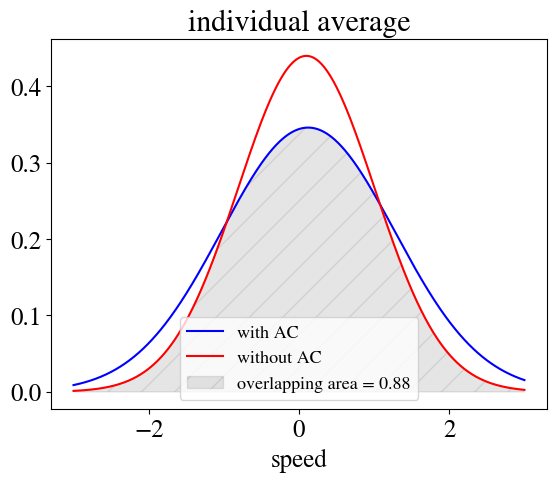

In [101]:
import scipy.stats as stats

fig,ax = plt.subplots()

x = np.linspace(-3,3,800)

dist_wAC = stats.norm.pdf(x,final_avg_wAC,final_std_wAC)
dist_woAC = stats.norm.pdf(x,final_avg_woAC,final_std_woAC)
min_bt_arrays=[]
for i in range(len(x)):
    min_bt_arrays.append(min(dist_wAC[i],dist_woAC[i]))
overlap = np.trapz(min_bt_arrays,x)

ax.plot(x, dist_wAC,color='blue', label = 'with AC')
ax.plot(x, dist_woAC,color='red', label = 'without AC')
ax.fill_between(x,0,min_bt_arrays,color='grey',alpha=0.2,label=f'overlapping area = {overlap:.2f}',hatch='/')
ax.set_xlabel('speed')
plt.title('individual average')
ax.legend(fontsize=13,markerscale=0)
plt.show()

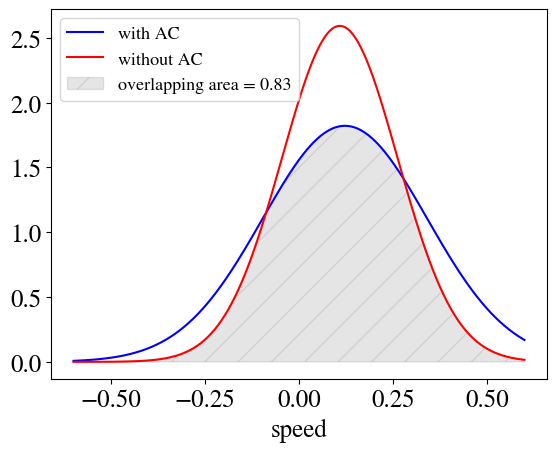

In [55]:
import scipy.stats as stats

fig,ax = plt.subplots()

x = np.linspace(-0.6,0.6,800)

dist_wAC = stats.norm.pdf(x,vAC,ACstd)
dist_woAC = stats.norm.pdf(x,v_woAC,std_woAC)
min_bt_arrays=[]
for i in range(len(x)):
    min_bt_arrays.append(min(dist_wAC[i],dist_woAC[i]))
overlap = np.trapz(min_bt_arrays,x)

ax.plot(x, dist_wAC,color='blue', label = 'with AC')
ax.plot(x, dist_woAC,color='red', label = 'without AC')
ax.fill_between(x,0,min_bt_arrays,color='grey',alpha=0.2,label=f'overlapping area = {overlap:.2f}',hatch='/')
ax.set_xlabel('speed')
ax.legend(fontsize=13,markerscale=0)
plt.show()

# Shuffled test


With ACs

In [68]:
ids = np.copy(ids_AC_video1)
np.random.shuffle(ids)
new_front_video1 = ids[:len(ids)//2]
new_back_video1 = ids[len(ids)//2:]

speeds_video1_wAC_shuffle= []
errspeeds_video1_wAC_shuffle = []
for i,id in enumerate(ids_AC_video1):
    traj= AC_video1_dataframe[AC_video1_dataframe['Track ID'] == id].sort_values('Frame')
    if id in new_front_video1:
    
        # X = traj.values[:,2]
        # Y = traj.values[:,3]
        # time = traj.values[:,4]
        speed = traj.values[:,10]
    else:
        continue
    speeds_video1_wAC_shuffle.append(speed.mean())
    errspeeds_video1_wAC_shuffle.append(speed.std())
    
errspeeds_video1_wAC_shuffle = np.square(np.array(errspeeds_video1_wAC_shuffle))
errspeeds_video1_wAC_value_avg_shuffle = np.sqrt(np.sum(errspeeds_video1_wAC_shuffle))

In [69]:
ids = np.copy(ids_AC_video2)
np.random.shuffle(ids)
new_front_video2 = ids[:len(ids)//2]
new_back_video2 = ids[len(ids)//2:]
speeds_video2_wAC_shuffle= []
errspeeds_video2_wAC_shuffle= []
for i,id in enumerate(ids_AC_video2):
    traj= AC_video2_dataframe[AC_video2_dataframe['Track ID'] == id].sort_values('Frame')

    if id in new_front_video2:
        speed = traj.values[:,10]
    else:
        continue
    
    speeds_video2_wAC_shuffle.append(speed.mean())
    errspeeds_video2_wAC_shuffle.append(speed.std())

errspeeds_video2_wAC_shuffle = np.square(np.array(errspeeds_video2_wAC_shuffle))
errspeeds_video2_wAC_value_avg_shuffle = np.sqrt(np.sum(errspeeds_video2_wAC_shuffle))

In [70]:
ids = np.copy(ids_AC_video5)
np.random.shuffle(ids)
new_front_video5 = ids[:len(ids)//2]
new_back_video5 = ids[len(ids)//2:]
speeds_video5_wAC_shuffle= []
errspeeds_video5_wAC_shuffle= []
for i,id in enumerate(ids_AC_video5):
    traj= AC_video5_dataframe[AC_video5_dataframe['Track ID'] == id].sort_values('Frame')
    
    
    if id in new_front_video5:
        speed = traj.values[:,10]
    else:
        continue
    speeds_video5_wAC_shuffle.append(speed.mean())
    errspeeds_video5_wAC_shuffle.append(speed.std())
        
errspeeds_video5_wAC_shuffle = np.square(np.array(errspeeds_video5_wAC_shuffle))
errspeeds_video5_wAC_value_avg_shuffle = np.sqrt(np.sum(errspeeds_video5_wAC_shuffle))

In [ ]:
speeds_videos_w_AC_shuffle = {}
speeds_videos_w_AC_shuffle['video 1'] = [np.average(speeds_video1_wAC_shuffle),errspeeds_video1_wAC_value_avg_shuffle]
speeds_videos_w_AC_shuffle['video 2'] = [np.average(speeds_video2_wAC_shuffle),errspeeds_video2_wAC_value_avg_shuffle]
speeds_videos_w_AC_shuffle['video 5'] = [np.average(speeds_video5_wAC_shuffle),errspeeds_video5_wAC_value_avg_shuffle]


avg2 = (speeds_videos_w_AC_shuffle['video 1'][0]+speeds_videos_w_AC_shuffle['video 2'][0]+speeds_videos_w_AC_shuffle['video 5'][0])/3
std2 = np.sqrt(speeds_videos_w_AC_shuffle['video 1'][1]**2+speeds_videos_w_AC['video 2'][1]**2+speeds_videos_w_AC_shuffle['video 5'][1]**2)
avg2,std2

(0.1221983956939658, 0.8840466074295539)

Wihout ACS

In [87]:
videos= [2,3,4]
ids_all = []
ids_front_shuffled_all = []
for video in videos:
    a = np.loadtxt(f'data/new-videos/video{video}/ids_video{video}.dat',dtype=int)
    ids_all.append(a)

    ids = np.copy(a)
    np.random.shuffle(ids)
    new_front = ids[:len(ids)//2]
    # new_back_video5 = ids[len(ids)//2:]
    ids_front_shuffled_all.append(new_front)
    
videos_speeds_wo_AC = []
stds_speeds_wo_AC = []
for video in videos:
    if video == 2:
        ids1 = ids_all[0]
        ids2 = ids_front_shuffled_all[0]
    if video == 3:
        ids1 = ids_all[1]
        ids2 = ids_front_shuffled_all[1]
    if video == 4:
        ids1 = ids_all[2]
        ids2 = ids_front_shuffled_all[2]
        
    aux = []
    aux_std=[]
    for id in ids2:
        speed = np.loadtxt(f'data/new-videos/video{video}/velocities/mag_v_time_bact_id_{id}.dat',usecols=1)
        aux.append(speed.mean())

        aux_std.append(speed.std())
    avg= np.average(aux)
    aux_std = np.array(aux_std)
    std = np.sqrt(np.sum(np.square(aux_std)))
    videos_speeds_wo_AC.append(avg)
    stds_speeds_wo_AC.append(std)

final_avg = np.average(videos_speeds_wo_AC)
final_std = np.sqrt(np.sum(np.square(stds_speeds_wo_AC)))
final_avg,final_std

(0.10152103842252895, 0.6383357713768857)